In [131]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [132]:
df=pd.read_csv("E:\Loan Appove\loan_data.csv")
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561   
1                 0.08                         2.0           504   
2                 0.44                         3.0           635   
3                 0.44                         2.0           675   
4                 0.53                         4.0           586   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [133]:
df.shape

(45000, 14)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [135]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [136]:
df.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score', 'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

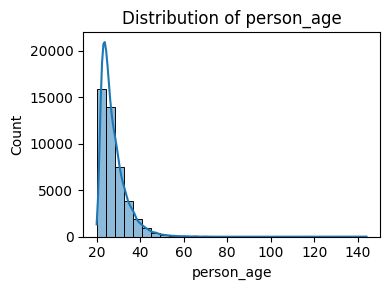

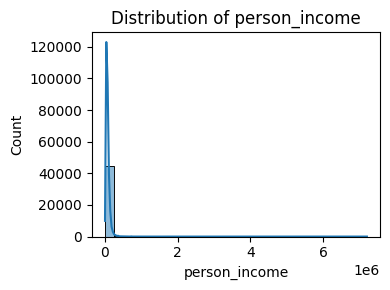

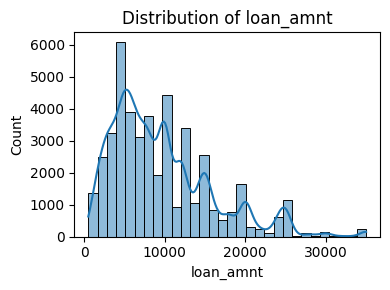

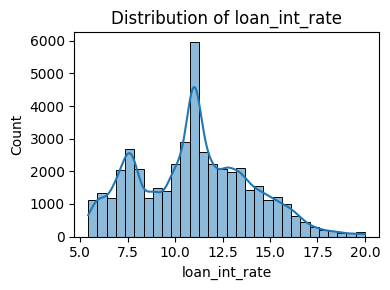

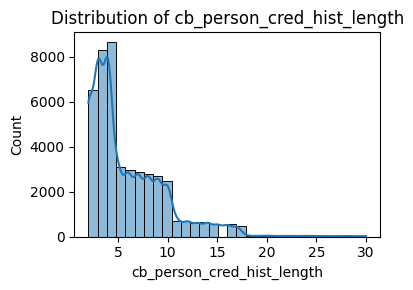

In [137]:
numeric_col=['person_age', 'person_income',
       'person_emp_exp', 'loan_amnt',
       'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
       'credit_score']
for col in numeric_col:
    plt.figure(figsize=(4,3))
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

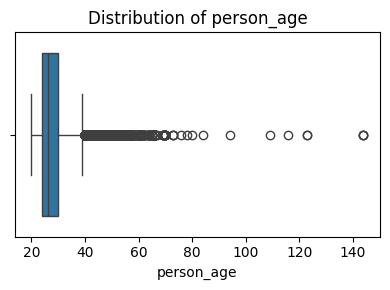

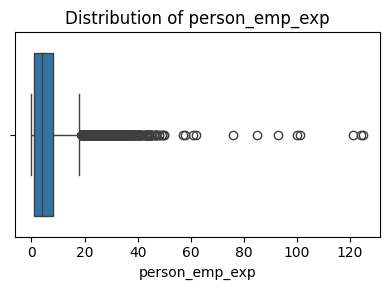

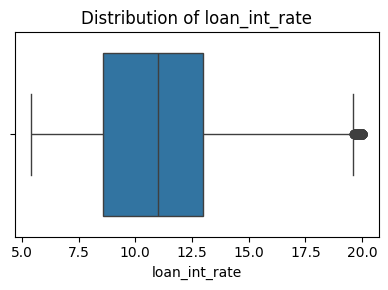

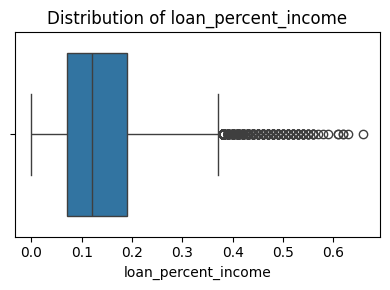

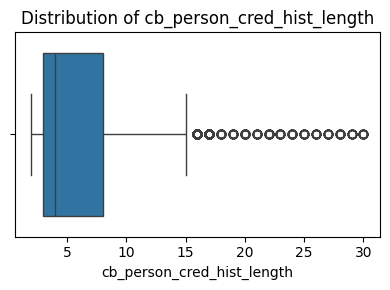

In [138]:
for col in numeric_col:
    plt.figure(figsize=(4,3))
    sns.boxplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

In [139]:
df_copy=df.copy()

In [140]:
# 'person_age', 'person_income',
#        'person_emp_exp', 'loan_amnt',
#        'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length',
#        'credit_score'
df_copy.loc[df_copy['person_age'] > 37, 'person_age'] = df_copy['person_age'].mean()
df_copy.loc[df_copy['person_income'] > 100000, 'person_income'] = df_copy['person_income'].mean()
df_copy.loc[df_copy['person_emp_exp'] > 16, 'person_emp_exp'] = df_copy['person_emp_exp'].mean()
df_copy.loc[df_copy['loan_amnt'] > 22000, 'loan_amnt'] = df_copy['loan_amnt'].mean()
df_copy.loc[df_copy['loan_int_rate'] > 18, 'loan_int_rate'] = df_copy['loan_int_rate'].mean()
df_copy.loc[df_copy[ 'loan_percent_income'] > 0.3,  'loan_percent_income'] = df_copy[ 'loan_percent_income'].mean()
df_copy.loc[df_copy['cb_person_cred_hist_length'] > 13, 'cb_person_cred_hist_length'] = df_copy['cb_person_cred_hist_length'].mean()
df_copy.loc[(df_copy['credit_score'] > 750) | (df_copy['credit_score'] < 520),'credit_score'] = df_copy['credit_score'].mean()


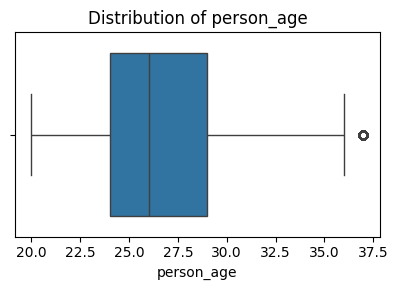

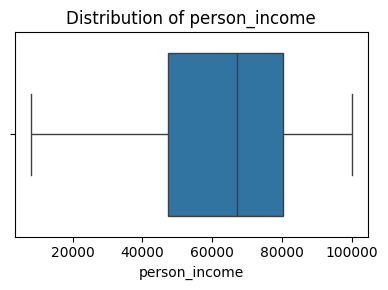

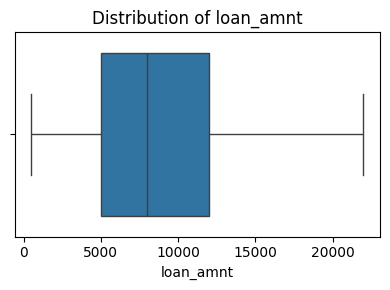

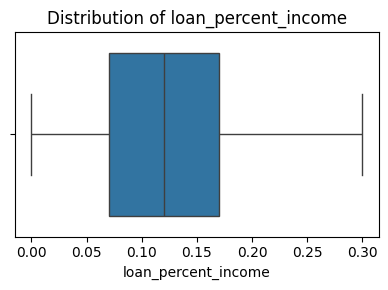

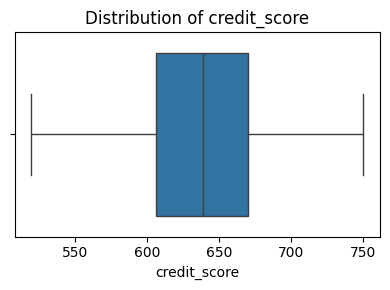

In [141]:
for col in numeric_col:
    plt.figure(figsize=(4,3))
    sns.boxplot(x=df_copy[col])
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

In [142]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.show()

PREPROCESSING

In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [144]:
df['person_gender'].unique()

array(['female', 'male'], dtype=object)

In [145]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

In [146]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [147]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

In [148]:
df['previous_loan_defaults_on_file'].unique()

array(['No', 'Yes'], dtype=object)

In [149]:
df_copy['person_gender']=df_copy['person_gender'].map({
    'female':'1',
    'male':0
})

In [150]:
df_copy['previous_loan_defaults_on_file']=df_copy['previous_loan_defaults_on_file'].map({
    'Yes':'1',
    'No':0
})

In [151]:
df_copy = df_copy.rename(columns={
    'person_gender': 'is_female',
    'previous_loan_defaults_on_file': 'prev_loan_on_file'
})

In [152]:
df_copy.head()

person_age is_female person_education  person_income  person_emp_exp  \
0        22.0         1           Master        71948.0             0.0   
1        21.0         1      High School        12282.0             0.0   
2        25.0         1      High School        12438.0             3.0   
3        23.0         1         Bachelor        79753.0             0.0   
4        24.0         0           Master        66135.0             1.0   

  person_home_ownership    loan_amnt loan_intent  loan_int_rate  \
0                  RENT  9583.157556    PERSONAL          16.02   
1                   OWN  1000.000000   EDUCATION          11.14   
2              MORTGAGE  5500.000000     MEDICAL          12.87   
3                  RENT  9583.157556     MEDICAL          15.23   
4                  RENT  9583.157556     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0             0.139725                         3.0    561.000000   
1             0.080000                         2.0    632.608756   
2             0.139725                         3.0    635.000000   
3             0.139725                         2.0    675.000000   
4             0.139725                         4.0    586.000000   

  prev_loan_on_file  loan_status  
0                 0            1  
1                 1            0  
2                 0            1  
3                 0            1  
4                 0            1

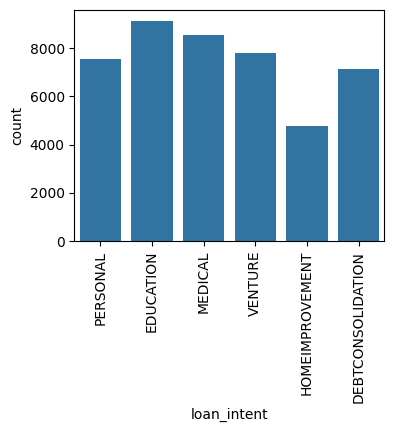

In [153]:
col=['person_education','person_home_ownership','loan_intent']
for c in col:
    plt.figure(figsize=(4,3))
    sns.countplot(x=df_copy[c])
    plt.xticks(rotation=90)
    plt.show()

In [154]:
df_copy.groupby('loan_intent')['loan_status'].agg(['count', 'sum'])


count   sum
loan_intent                   
DEBTCONSOLIDATION   7145  2163
EDUCATION           9153  1552
HOMEIMPROVEMENT     4783  1258
MEDICAL             8548  2378
PERSONAL            7552  1521
VENTURE             7819  1128

In [155]:
df_copy = pd.get_dummies(df_copy, columns=['person_education'])

In [156]:
df_copy = pd.get_dummies(df_copy, columns=['loan_intent'])

In [157]:
df_copy = pd.get_dummies(df_copy, columns=['person_home_ownership'])

In [158]:
df_copy.head()

person_age is_female  person_income  person_emp_exp    loan_amnt  \
0        22.0         1        71948.0             0.0  9583.157556   
1        21.0         1        12282.0             0.0  1000.000000   
2        25.0         1        12438.0             3.0  5500.000000   
3        23.0         1        79753.0             0.0  9583.157556   
4        24.0         0        66135.0             1.0  9583.157556   

   loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0          16.02             0.139725                         3.0   
1          11.14             0.080000                         2.0   
2          12.87             0.139725                         3.0   
3          15.23             0.139725                         2.0   
4          14.27             0.139725                         4.0   

   credit_score prev_loan_on_file  ...  loan_intent_DEBTCONSOLIDATION  \
0    561.000000                 0  ...                          False   
1    632.608756                 1  ...                          False   
2    635.000000                 0  ...                          False   
3    675.000000                 0  ...                          False   
4    586.000000                 0  ...                          False   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
0                  False                        False                False   
1                   True                        False                False   
2                  False                        False                 True   
3                  False                        False                 True   
4                  False                        False                 True   

   loan_intent_PERSONAL  loan_intent_VENTURE  person_home_ownership_MORTGAGE  \
0                  True                False                           False   
1                 False                False                           False   
2                 False                False                            True   
3                 False                False                           False   
4                 False                False                           False   

   person_home_ownership_OTHER  person_home_ownership_OWN  \
0                        False                      False   
1                        False                       True   
2                        False                      False   
3                        False                      False   
4                        False                      False   

   person_home_ownership_RENT  
0                        True  
1                       False  
2                       False  
3                        True  
4                        True  

[5 rows x 26 columns]

In [159]:
df_copy=df_copy.astype(int)

In [160]:
df_copy.head()

person_age  is_female  person_income  person_emp_exp  loan_amnt  \
0          22          1          71948               0       9583   
1          21          1          12282               0       1000   
2          25          1          12438               3       5500   
3          23          1          79753               0       9583   
4          24          0          66135               1       9583   

   loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0             16                    0                           3   
1             11                    0                           2   
2             12                    0                           3   
3             15                    0                           2   
4             14                    0                           4   

   credit_score  prev_loan_on_file  ...  loan_intent_DEBTCONSOLIDATION  \
0           561                  0  ...                              0   
1           632                  1  ...                              0   
2           635                  0  ...                              0   
3           675                  0  ...                              0   
4           586                  0  ...                              0   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
0                      0                            0                    0   
1                      1                            0                    0   
2                      0                            0                    1   
3                      0                            0                    1   
4                      0                            0                    1   

   loan_intent_PERSONAL  loan_intent_VENTURE  person_home_ownership_MORTGAGE  \
0                     1                    0                               0   
1                     0                    0                               0   
2                     0                    0                               1   
3                     0                    0                               0   
4                     0                    0                               0   

   person_home_ownership_OTHER  person_home_ownership_OWN  \
0                            0                          0   
1                            0                          1   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   person_home_ownership_RENT  
0                           1  
1                           0  
2                           0  
3                           1  
4                           1  

[5 rows x 26 columns]

In [161]:
df_copy.shape

(45000, 26)

FEATURE ENGINEERING

In [162]:
cols=['person_age','person_income','loan_amnt','loan_int_rate','credit_score']

In [163]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for c in cols:
    df_copy[c] = scaler.fit_transform(df_copy[[c]])


In [164]:
df_copy.head()

person_age  is_female  person_income  person_emp_exp  loan_amnt  \
0   -1.205914          1       0.406654               0   0.189217   
1   -1.466113          1      -2.522872               0  -1.591371   
2   -0.425316          1      -2.515212               3  -0.657823   
3   -0.945715          1       0.789870               0   0.189217   
4   -0.685515          0       0.121243               1   0.189217   

   loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0       1.941926                    0                           3   
1       0.206555                    0                           2   
2       0.553629                    0                           3   
3       1.594852                    0                           2   
4       1.247778                    0                           4   

   credit_score  prev_loan_on_file  ...  loan_intent_DEBTCONSOLIDATION  \
0     -1.658599                  0  ...                              0   
1     -0.086953                  1  ...                              0   
2     -0.020545                  0  ...                              0   
3      0.864889                  0  ...                              0   
4     -1.105202                  0  ...                              0   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  \
0                      0                            0                    0   
1                      1                            0                    0   
2                      0                            0                    1   
3                      0                            0                    1   
4                      0                            0                    1   

   loan_intent_PERSONAL  loan_intent_VENTURE  person_home_ownership_MORTGAGE  \
0                     1                    0                               0   
1                     0                    0                               0   
2                     0                    0                               1   
3                     0                    0                               0   
4                     0                    0                               0   

   person_home_ownership_OTHER  person_home_ownership_OWN  \
0                            0                          0   
1                            0                          1   
2                            0                          0   
3                            0                          0   
4                            0                          0   

   person_home_ownership_RENT  
0                           1  
1                           0  
2                           0  
3                           1  
4                           1  

[5 rows x 26 columns]

In [169]:
X = df_copy.drop(columns=['loan_status'])    

In [170]:
y = df_copy['loan_status'] 

In [173]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

LINEAR REGRESSION

In [174]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [175]:
y_pred=model.predict(X_test)

In [176]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.42322852679300726

LOGISTIC REGRESSION

In [187]:
from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()

In [190]:
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.fit_transform(X_test)

In [191]:
model_lr.fit(X_train-X_train_scale,y_train)

LogisticRegression()

In [192]:
y_pred=model_lr.predict(X_test_scale)

In [224]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [193]:
acc= accuracy_score(y_test,y_pred)

In [194]:
acc

0.5491582491582492

KNN: K_NEAREST NEIGHBOUR

In [196]:
from sklearn.neighbors import KNeighborsClassifier
knn_model= KNeighborsClassifier()
knn_model.fit(X_train_scale,y_train)

KNeighborsClassifier()

In [198]:
y_pred_knn=knn_model.predict(X_test_scale)


In [199]:
a=accuracy_score(y_test,y_pred_knn)
a

0.8709090909090909

In [200]:
confusion_matrix(y_test,y_pred_knn)

array([[10745,   800],
       [ 1117,  2188]])

In [201]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92     11545
           1       0.73      0.66      0.70      3305

    accuracy                           0.87     14850
   macro avg       0.82      0.80      0.81     14850
weighted avg       0.87      0.87      0.87     14850



In [202]:
from sklearn.naive_bayes import GaussianNB
model_NB= GaussianNB()

NAIVE BAISE

In [203]:
model_NB.fit(X_train,y_train)

GaussianNB()

In [204]:
y_pred_NB=model_NB.predict(X_test)

In [205]:
acc=accuracy_score(y_test,y_pred)
acc

0.5491582491582492

In [206]:
confusion_matrix(y_test,y_pred_NB)

array([[7821, 3724],
       [  75, 3230]])

In [207]:
print(classification_report(y_test,y_pred_NB))

              precision    recall  f1-score   support

           0       0.99      0.68      0.80     11545
           1       0.46      0.98      0.63      3305

    accuracy                           0.74     14850
   macro avg       0.73      0.83      0.72     14850
weighted avg       0.87      0.74      0.77     14850



DECISION TREE

In [209]:
from sklearn.tree import DecisionTreeClassifier
model_DT=DecisionTreeClassifier()
model_DT.fit(X_train_scale,y_train)

DecisionTreeClassifier()

In [211]:
y_pred_DT=model_DT.predict(X_test_scale)

In [212]:
a=accuracy_score(y_test,y_pred_DT)
a

0.8862626262626263

In [215]:
confusion_matrix(y_test,y_pred_DT)

array([[10656,   889],
       [  800,  2505]])

In [214]:
print(classification_report(y_test,y_pred_DT))

              precision    recall  f1-score   support

           0       0.93      0.92      0.93     11545
           1       0.74      0.76      0.75      3305

    accuracy                           0.89     14850
   macro avg       0.83      0.84      0.84     14850
weighted avg       0.89      0.89      0.89     14850



SVM: SUPPORT VECTOR MACHINE

In [217]:
from sklearn.svm import SVC
model_svm=SVC()
model_svm.fit(X_train_scale,y_train)

SVC()

In [220]:
y_pred_svm=model_svm.predict(X_test_scale)

In [221]:
a=accuracy_score(y_test,y_pred_svm)
a

0.8983838383838384

In [222]:
confusion_matrix(y_test,y_pred_svm)

array([[10926,   619],
       [  890,  2415]])

In [223]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94     11545
           1       0.80      0.73      0.76      3305

    accuracy                           0.90     14850
   macro avg       0.86      0.84      0.85     14850
weighted avg       0.90      0.90      0.90     14850

